In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from quantum_systems import OneDimensionalHarmonicOscillator
from configuration_interaction import CIS, CID, CISD

In [58]:
n = 2
l = 12

radius = 10
num_grid_points = 201
omega = 0.25
mass = 1

odho = OneDimensionalHarmonicOscillator(n, l, radius, num_grid_points, omega=omega, mass=mass)
odho.setup_system()

odho.change_to_hf_basis(tolerance=1e-6, verbose=True)

HF converged to given precision in 21 iterations
Ehf: (1.179591165570661+0j)


In [59]:
cis = CIS(odho, brute_force=False, verbose=True, np=np)
cis.setup_ci_space()

Number of states to create: 21
Size of a state in bytes: 8
Time spent setting up CIS space: 2.9325485229492188e-05 sec


In [60]:
cis.compute_ground_state()

Time spent constructing Hamiltonian: 0.0006768703460693359 sec
Time spent diagonalizing Hamiltonian: 0.0010268688201904297 sec


In [61]:
print("CIS ground state energy: {0}".format(cis.energies[0]))

CIS ground state energy: 0.8603180942773433


In [62]:
rho_cis = cis.compute_particle_density()

Time spent computing one-body matrix: 0.0344693660736084 sec


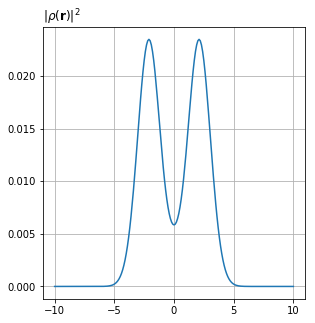

In [63]:
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(1, 3, 1)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.plot(odho.grid, np.abs(rho_cis * rho_cis.conj()))
plt.grid()

In [64]:
cid = CID(odho, brute_force=False, verbose=True, np=np)
cid.setup_ci_space()

Number of states to create: 46
Size of a state in bytes: 8
Time spent setting up CID space: 0.0008082389831542969 sec


In [65]:
cid.compute_ground_state()

Time spent constructing Hamiltonian: 0.005887269973754883 sec
Time spent diagonalizing Hamiltonian: 0.00442957878112793 sec


In [66]:
print("CID ground state energy: {0}".format(cid.energies[0]))

CID ground state energy: 0.8399421618466749


In [67]:
rho_cid = cid.compute_particle_density()

Time spent computing one-body matrix: 0.11613988876342773 sec


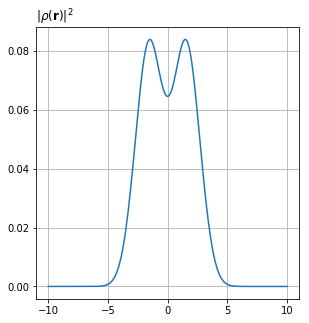

In [68]:
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(1, 3, 1)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.plot(odho.grid, np.abs(rho_cid * rho_cid.conj()))
plt.grid()

In [69]:
cisd = CISD(odho, brute_force=False, verbose=True, np=np)
cisd.setup_ci_space()

Number of states to create: 66
Size of a state in bytes: 8
Time spent setting up CISD space: 0.00043654441833496094 sec


In [70]:
cisd.compute_ground_state()

Time spent constructing Hamiltonian: 0.011089563369750977 sec
Time spent diagonalizing Hamiltonian: 0.0037262439727783203 sec


In [71]:
print("CISD ground state energy: {0}".format(cisd.energies[0]))

CISD ground state energy: 0.8258351144820135


In [72]:
rho_cisd = cisd.compute_particle_density()

Time spent computing one-body matrix: 0.23802685737609863 sec


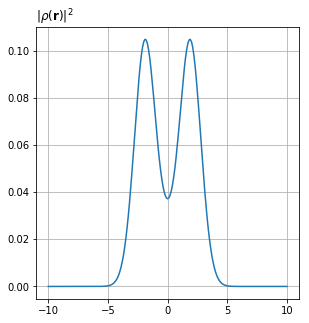

In [73]:
fig = plt.figure(figsize=(16, 5))

ax = fig.add_subplot(1, 3, 1)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.plot(odho.grid, np.abs(rho_cisd)**2)
plt.grid()